<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

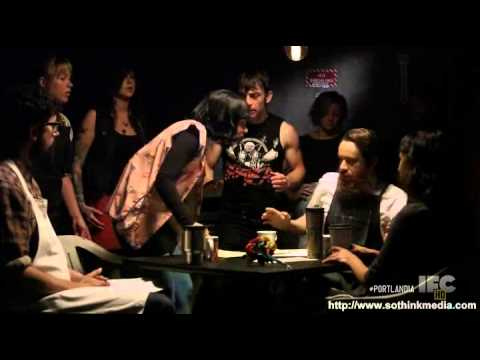

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\mathi\\Lambda_Repo\\Unit 4\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [1]:
# Start here 
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
from collections import Counter
import re
import pandas as pd
from datetime import datetime
# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [103]:
shops = pd.read_csv(url)

In [83]:
# df['dates'] = ''
# df['review_text'] = ''
lst = []
ser = pd.Series()
df.head()

,coffee_shop_name,full_review_text,star_rating,dates,review_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,None,NaN
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,None,NaN
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,None,NaN
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,None,NaN
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,None,NaN


In [70]:
test_string = '11/25/2016 1 check-in Love love loved the atm'
test_string_split = test_string.split(' ', 1)
# print(test_string_split[0])
test_s0 = test_string_split[0]
type(test_s0)

str

In [71]:
print(test_s0)

11/25/2016


In [62]:
header_list = ['coffee_shop_name', 'full_review_text', 'star_rating', 'dates', 'review_text']
df = df.reindex(columns = header_list)    

In [63]:
df.head()

,coffee_shop_name,full_review_text,star_rating,dates,review_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,NaN,NaN
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,NaN,NaN
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,NaN,NaN
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,NaN,NaN
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,NaN,NaN


In [170]:
lst = []
for row in df['full_review_text']:
    row = row.strip() # Remove opening & closing spaces
    row_split = row.split(' ', 1)
#     print('row_split: ', row_split)
    row_split_date = row_split[0]
#     print('row_split_date: ', row_split_date)
#     row_split_date_tolist = list(row_split_date)
#     print(row_split_date_tolist)
    row_split_date_lst = lst.append(row_split_date)
    print('row_split_date_lst: ', row_split_date_lst)
#     print(row_split_date_series)
#     print('row_split_date_series: ', row_split_date_series)
#     df['dates'] = df['dates'].append(row_split_date_series)

row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_date_lst:  None
row_split_da

In [162]:
# Plan: Grab dates from full_review_text and create a datetime column with them. Then remove them.

# Split string? string.split(s[, sep[, maxsplit]])
# use strptime, %m/%d//%Y
# How do limit to first part? Stop on ' '.
# Loop over full_review_text
# Grab these numbers and create new column.
# Maybe strip string data: .str.strip('T00:00:00')
# pd.to_datetime on new column / .astype('datetime64[ns]')
# Remove them from existing column.

for row in df['full_review_text']:
    row = row.strip() # Remove opening & closing spaces
    row_split = row.split(' ', 2)
    row_split_date = row_split[0]
    print('row_split_date: ', row_split_date)
    row_split_date_series = pd.Series(row_split_date)
    print('row_split_date_series: ', row_split_date_series)
    df['dates'] = df['dates'].append(row_split_date_series)

row_split_date:  11/25/2016
row_split_date_series:  0    11/25/2016
dtype: object


ValueError: cannot reindex from a duplicate axis

In [92]:
lst = []
print(lst)
for row in df['full_review_text']:
    row_split = row.split(' ', 2)
    row_split_date = row_split[1]
    print(row_split_date)
#     row_split_date_series = pd.Series(row_split_date)
#     print(row_split_date_series)
    lst = lst.append(row_split_date)
    print('lst:', lst)
df['dates'] = pd.Series(lst)

[]
11/25/2016
lst: None
12/2/2016


AttributeError: 'NoneType' object has no attribute 'append'

In [78]:
df.head()

,coffee_shop_name,full_review_text,star_rating,dates,review_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,None,NaN
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,None,NaN
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,None,NaN
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,None,NaN
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,None,NaN


In [105]:

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [106]:
tokenize(test_s0)


['11252016']

In [55]:
nlp = spacy.load("en_core_web_lg")

# Instantiate tokenizer
tokenizer = Tokenizer(nlp.vocab)

(7616, 3)

In [ ]:
# Tokenizer Pipe

tokens = []

''' Make them tokens '''

In [113]:
shops['full_review_text'].value_counts(normalize=True)[:1] # Why is this not working like in lecture? Because not cleaned?

 10/10/2016 This place is so cute. New favorite coffee spot on Burnet/in Northcross. Almost wish I was still in grad school,  so I would have an excuse to be there everyday.  Amazing coffee and best chicken & waffles ever! The chicken was seasoned perfectly and made for a delicious savory brunch (with the house made slaw they give you on the side). The olive oil cake was also awesome, light and sweet. Perfect coffee companion. My husband and I will definitely be back, as we loved everything and felt it was all very reasonable priced. Olive oil cake, chicken & waffle and 15-minutes-of-fame coffee! So good.     0.000525
Name: full_review_text, dtype: float64

In [114]:
# Counting the raw text
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [117]:
shops['tokens'].head(2)

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
Name: tokens, dtype: object

In [ ]:
# Doing some cleaning now.

In [ ]:
# Dates cleaning


In [ ]:
# Ratings cleaning


In [119]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [120]:
# Is this necessary? Was this function mainly for python instruction purposes?
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [121]:
# Use function
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
62,the,6847,34809,1.0,0.044537,0.044537,0.899028
21,and,6864,26650,2.0,0.034098,0.078634,0.901261
37,a,6246,22755,3.0,0.029114,0.107748,0.820116
32,i,5528,20237,4.0,0.025892,0.133641,0.725840
36,to,5653,17164,5.0,0.021961,0.155601,0.742253


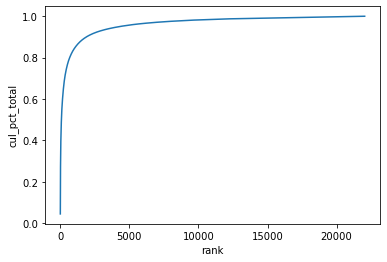

In [122]:
# Cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [123]:
# What percentage does our top 20 words account for?
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.31101830776336686

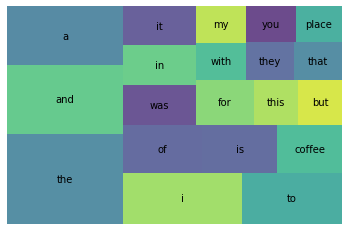

In [124]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [125]:
# Continuing, but with spacy
nlp = spacy.load("en_core_web_lg")

# Instantiate tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [126]:
# Tokenizer Pipe

tokens = []

''' Make them tokens '''
for doc in tokenizer.pipe(df['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [127]:
df['tokens'].head(2)

0    [ , 11/25/2016, 1, check-in, Love, love, loved...
1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
Name: tokens, dtype: object

In [128]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14,the,6520,27779,1.0,0.034334,0.034334,0.856092
42,and,6804,25748,2.0,0.031824,0.066157,0.893382
3,,7616,22606,3.0,0.027940,0.094097,1.000000
8,a,6181,22085,4.0,0.027296,0.121394,0.811581
33,I,5469,19780,5.0,0.024447,0.145841,0.718093


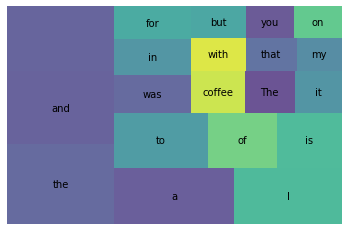

In [129]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [154]:
# Adding custom stop words
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'i', '.', '  ', ''])

In [155]:
# Making use of stop words
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [156]:
shops['tokens'].head(2)

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
Name: tokens, dtype: object

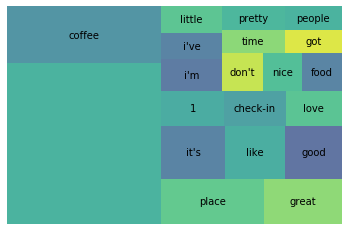

In [157]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
# How do fix the small i issue without adding it to stop words? Also whats the deal with the empty square.

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [158]:
# Using lemmetization
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    #
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [159]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [160]:
shops['lemmas'].head(2)

0    [ , 11/25/2016, 1, check, love, love, love, at...
1    [ , 12/2/2016, list, Date, Night, Austin, Ambi...
Name: lemmas, dtype: object

In [161]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

KeyError: 'lemmas'

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

